**Importiere die notwendigen Packages**

In [1]:
# Empfehlung für Colab: Installiere alles was Du brauchst
#%pip install pandas pivottablejs numpy altair matplotlib geopandas folium

In [24]:
import pandas as pd
import pivottablejs
from pivottablejs import pivot_ui
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime



In [25]:
import geopandas as gpd
import folium 


Definiere Settings. Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen), 

In [26]:
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

Importiere einen Datensatz von der **DWH_INT** Dropzone.

- Beachte dabei die Notation des Pfades...
- Definiere mal aktuell noch keine weiteren Parameter beim Import

**Dataset auf INTEG Datenkatalog**: https://data.integ.stadt-zuerich.ch/dataset/int_dwh_bau_best_whg_wfl_pers_ea_quartier_jahr_od6982

(int_dwh)

In [27]:
# Filepath
#INT
fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/INT_DWH/bau_best_whg_wfl_pers_ea_quartier_jahr_od6982/BAU698OD6982.csv"
#PROD
#fp = r"//szh.loc/ssz/applikationen/OGD_Dropzone/DWH/bau_best_whg_wfl_pers_ea_quartier_jahr_od6982/BAU698OD6982.csv"

# bau_best_whg_wfl_pers_ea_quartier_jahr_od6982



# Read the data
data2betested = pd.read_csv(
    fp, 
    sep=',',
   #usecols=[0,1,2,3,4,6],
   #names=['stationid','year','month','avgtemp','latitude','longitude','elevation','station','countryid','country'],
   #skiprows=1,
   # parse_dates=[0],
    parse_dates=True,
    #date_parser=lambda x: pd.to_datetime(x, format="%Y"), 
    #index_col="date_time",
    low_memory=False    
    )

In der Folge ein paar erste Tests:

In [28]:
type(data2betested)

pandas.core.frame.DataFrame

 - 1) Zeige eine kurze Vorschau der importierten Daten
 - 2) Weise die Datentypen aus
 - 3) Zeige die Shape (Umfang) des Datensatzes an

In [29]:
data2betested.head(3000)

,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzWhgBewohnt,WohnungsflBewohnt,PersInWhg,PersProWhg,WohnungsflProPers
0,2014,11,Rathaus,1,Kreis 1,1,Öffentlich/Genossenschaftlich,518,34268,861,2,40
1,2014,11,Rathaus,1,Kreis 1,2,Übrige private Gesellschaften,351,25092,601,2,42
2,2014,11,Rathaus,1,Kreis 1,3,Natürliche Personen,795,54287,1253,2,43
3,2014,11,Rathaus,1,Kreis 1,4,Im Stockwerkeigentum,147,10074,235,2,43
4,2014,12,Hochschulen,1,Kreis 1,1,Öffentlich/Genossenschaftlich,38,3845,85,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
947,2020,122,Schwamendingen-Mitte,12,Kreis 12,4,Im Stockwerkeigentum,411,36611,814,2,45
948,2020,123,Hirzenbach,12,Kreis 12,1,Öffentlich/Genossenschaftlich,2865,210245,6306,2,33
949,2020,123,Hirzenbach,12,Kreis 12,2,Übrige private Gesellschaften,1670,116930,3447,2,34
950,2020,123,Hirzenbach,12,Kreis 12,3,Natürliche Personen,1083,76458,2301,2,33


In [30]:
data2betested.dtypes

Jahr                   int64
QuarSort               int64
QuarLang              object
KreisSort              int64
KreisLang             object
EigGruSort             int64
EigGruLang            object
AnzWhgBewohnt          int64
WohnungsflBewohnt      int64
PersInWhg              int64
PersProWhg           float64
WohnungsflProPers    float64
dtype: object

In [31]:
data2betested.shape

(952, 12)

Beschreibe einzelne Attribute

In [32]:
data2betested.describe()

,Jahr,QuarSort,KreisSort,EigGruSort,AnzWhgBewohnt,WohnungsflBewohnt,PersInWhg,PersProWhg,WohnungsflProPers
count,952,952,952,952,952,952,952,952,952
mean,2017,65,6,2,1465,115892,2954,2,41
std,2,36,4,1,1327,100469,2687,0,7
min,2014,11,1,1,23,2567,44,2,28
25%,2015,33,3,2,359,31119,761,2,36
50%,2017,67,6,2,981,88035,1941,2,41
75%,2019,92,9,3,2363,189622,4535,2,46
max,2020,123,12,4,5881,427652,11544,4,62


Wie viele Nullwerte gibt es im Datensatz?

In [33]:
data2betested.isnull().sum()

Jahr                 0
QuarSort             0
QuarLang             0
KreisSort            0
KreisLang            0
EigGruSort           0
EigGruLang           0
AnzWhgBewohnt        0
WohnungsflBewohnt    0
PersInWhg            0
PersProWhg           0
WohnungsflProPers    0
dtype: int64

Wandle die Spalte Jahr von Int zu **Datetime** um. Dies wird in den meisten Grafiken so benötigt.

In [34]:
#data2betested['StichtagDatJahr']=pd.to_datetime(data2betested['StichtagDatJahr'], format='%Y')
data2betested['Jahr']=pd.to_datetime(data2betested['Jahr'], format='%Y')
#TO DO --> setze das Datum auf den 31.12. der Jahres.
#test=data2betested[['StichtagDatJahr']].date().replace(month=12, day=31)

data2betested


,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzWhgBewohnt,WohnungsflBewohnt,PersInWhg,PersProWhg,WohnungsflProPers
0,2014-01-01,11,Rathaus,1,Kreis 1,1,Öffentlich/Genossenschaftlich,518,34268,861,2,40
1,2014-01-01,11,Rathaus,1,Kreis 1,2,Übrige private Gesellschaften,351,25092,601,2,42
2,2014-01-01,11,Rathaus,1,Kreis 1,3,Natürliche Personen,795,54287,1253,2,43
3,2014-01-01,11,Rathaus,1,Kreis 1,4,Im Stockwerkeigentum,147,10074,235,2,43
4,2014-01-01,12,Hochschulen,1,Kreis 1,1,Öffentlich/Genossenschaftlich,38,3845,85,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...
947,2020-01-01,122,Schwamendingen-Mitte,12,Kreis 12,4,Im Stockwerkeigentum,411,36611,814,2,45
948,2020-01-01,123,Hirzenbach,12,Kreis 12,1,Öffentlich/Genossenschaftlich,2865,210245,6306,2,33
949,2020-01-01,123,Hirzenbach,12,Kreis 12,2,Übrige private Gesellschaften,1670,116930,3447,2,34
950,2020-01-01,123,Hirzenbach,12,Kreis 12,3,Natürliche Personen,1083,76458,2301,2,33


Bereite die Daten für die Grafik unten vor

In [35]:
Jahre = data2betested.groupby("Jahr")
len(Jahre)

7

In [36]:
for key, group in Jahre:
    print(key, len(group))

2014-01-01 00:00:00 136
2015-01-01 00:00:00 136
2016-01-01 00:00:00 136
2017-01-01 00:00:00 136
2018-01-01 00:00:00 136
2019-01-01 00:00:00 136
2020-01-01 00:00:00 136


In [37]:
myJahr = "2020-01-01"
aktuellesJahr=Jahre.get_group(myJahr)   
aktuellesJahr.head(3)


,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzWhgBewohnt,WohnungsflBewohnt,PersInWhg,PersProWhg,WohnungsflProPers
816,2020-01-01,11,Rathaus,1,Kreis 1,1,Öffentlich/Genossenschaftlich,527,34908,895,2,39
817,2020-01-01,11,Rathaus,1,Kreis 1,2,Übrige private Gesellschaften,460,30742,707,2,44
818,2020-01-01,11,Rathaus,1,Kreis 1,3,Natürliche Personen,730,52412,1188,2,44


**Selektionen und Aggregationen**

Check this [Doku](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [38]:
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

# produces Pandas Series
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])['AnzBestWir'].sum()
# Produces Pandas DataFrame
    #data2betested.groupby(['StichtagDatJahr', 'KonOGDSort'])[['AnzBestWir']].sum()
    
test = data2betested.groupby(
    ['Jahr']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'AnzWhgBewohnt': 'sum',
         'WohnungsflBewohnt': 'sum',
        'WohnungsflProPers':'sum',
         'PersProWhg': 'sum',  # get the first date per group
        'PersInWhg':'sum'
    }
)
test.head(100)
    

,AnzWhgBewohnt,WohnungsflBewohnt,WohnungsflProPers,PersProWhg,PersInWhg
Jahr,,,,,
2014-01-01,190873,14959107,5605,276,383880
2015-01-01,193770,15250029,5608,277,390612
2016-01-01,196628,15515853,5618,276,395662
2017-01-01,198919,15758224,5594,278,402759
2018-01-01,201550,15996226,5583,278,408726
2019-01-01,205928,16344893,5646,276,414590
2020-01-01,207383,16505049,5675,275,416335


**Einfache Visualisierungen zur Plausi**

Exploriere die Daten mit Pivottable.JS

In [39]:
from pivottablejs import pivot_ui

pivot_ui(data2betested)

Liniendiagramm 
[Link zur Doku](https://altair-viz.github.io/gallery/multiline_highlight.html)

In [40]:
mySelection = aktuellesJahr.groupby(
    ['Jahr']
#   ['Jahr','QuarSort', 'QuarLang']
).agg(
    {
        'AnzWhgBewohnt': 'sum',
         'WohnungsflBewohnt': 'sum',
        'WohnungsflProPers':'sum',
         'PersProWhg': 'sum',  # get the first date per group
        'PersInWhg':'sum'
    }
)
mySelection


,AnzWhgBewohnt,WohnungsflBewohnt,WohnungsflProPers,PersProWhg,PersInWhg
Jahr,,,,,
2020-01-01,207383,16505049,5675,275,416335


In [41]:
mySelection = aktuellesJahr[["Jahr","QuarLang","QuarSort","AnzWhgBewohnt", 'WohnungsflBewohnt', "WohnungsflProPers", "PersProWhg", "PersInWhg"]]
mySelection

,Jahr,QuarLang,QuarSort,AnzWhgBewohnt,WohnungsflBewohnt,WohnungsflProPers,PersProWhg,PersInWhg
816,2020-01-01,Rathaus,11,527,34908,39,2,895
817,2020-01-01,Rathaus,11,460,30742,44,2,707
818,2020-01-01,Rathaus,11,730,52412,44,2,1188
819,2020-01-01,Rathaus,11,166,11743,43,2,275
820,2020-01-01,Hochschulen,12,36,3593,49,2,74
...,...,...,...,...,...,...,...,...
947,2020-01-01,Schwamendingen-Mitte,122,411,36611,45,2,814
948,2020-01-01,Hirzenbach,123,2865,210245,33,2,6306
949,2020-01-01,Hirzenbach,123,1670,116930,34,2,3447
950,2020-01-01,Hirzenbach,123,1083,76458,33,2,2301


In [42]:
agg_mySelection = mySelection.groupby(
   ['Jahr', 'QuarLang', 'QuarSort']
).agg(
    {
         'AnzWhgBewohnt':('sum'),     # Sum --> (sum)
         'WohnungsflBewohnt': ('sum'),
        'WohnungsflProPers': ('mean'),
        'PersProWhg':('mean'),
        'PersInWhg':('sum')
    }
)
agg_mySelection

AnzWhgBewohnt  WohnungsflBewohnt  WohnungsflProPers  \
Jahr       QuarLang             QuarSort                                                        
2020-01-01 Affoltern            111               11517             951547                 39   
           Albisrieden          91                10825             866051                 41   
           Alt-Wiedikon         31                 8837             662884                 39   
           Altstetten           92                16766            1243070                 39   
           City                 14                  291              29095                 47   
           Enge                 24                 4552             411989                 43   
           Escher Wyss          52                 2993             293403                 44   
           Fluntern             71                 3794             416191                 48   
           Friesenberg          33                 4304             348791                 40   
           Gewerbeschule        51                 4712             335938                 39   
           Hard                 44                 6434             426928                 35   
           Hirslanden           73                 3626             318421                 45   
           Hirzenbach           123                5843             423720                 34   
           Hochschulen          12                  238              20863                 50   
           Hottingen            72                 5348             510295                 46   
           Höngg                101               11197             975344                 43   
           Langstrasse          42                 6380             433689                 40   
           Leimbach             23                 2524             217655                 39   
           Lindenhof            13                  596              44574                 45   
           Mühlebach            82                 3314             266327                 43   
           Oberstrass           63                 5181             459076                 45   
           Oerlikon             115               11283             870400                 39   
           Rathaus              11                 1883             129805                 42   
           Saatlen              121                3466             297322                 40   
           Schwamendingen-Mitte 122                5565             390296                 37   
           Seebach              119               11855             919072                 38   
           Seefeld              81                 3138             243799                 46   
           Sihlfeld             34                11422             785880                 37   
           Unterstrass          61                11687             922976                 40   
           Weinegg              83                 2432             218959                 43   
           Werd                 41                 2142             158422                 40   
           Wipkingen            102                8597             621751                 40   
           Witikon              74                 5306             515175                 47   
           Wollishofen          21                 9335             775341                 43   

                                          PersProWhg  PersInWhg  
Jahr       QuarLang             QuarSort                         
2020-01-01 Affoltern            111                2      25622  
           Albisrieden          91                 2      21709  
           Alt-Wiedikon         31                 2      16965  
           Altstetten           92                 2      33193  
           City                 14                 2        678  
           Enge                 24                 2       9253  
           Escher Wys

In [43]:
# df_statzonen = df_statzonen[(df_statzonen.knr>0) & (df_statzonen.qname!="Hirslanden")]
#aktuellesJahr[[aktuellesJahr.KreisSort =7]])
highlight = alt.selection(type='single', on='mouseover',
                          fields=['Jahr'], nearest=True)
#x='date:StichtagDatJahr',
base = alt.Chart(mySelection).encode(
    x='QuarLang',
    y='WohnungsflProPers',
    color='Jahr'
)

points = base.mark_circle().encode(
    opacity=alt.value(0)
).add_selection(
    highlight
).properties(
    width=700 , height=300
)
lines = base.mark_line().encode(
    size=alt.condition(~highlight, alt.value(1.5), alt.value(4))
).interactive()

points + lines

alt.LayerChart(...)

In [44]:
alt.Chart(data2betested).mark_circle(size=60).encode(
    x='Jahr',
    y='EigGruLang',
    #color='AnzNat',
    #color=alt.Color('AnzNat', scale=alt.Scale(scheme='dark2')),
    color=alt.Color('WohnungsflProPers', scale=alt.Scale(scheme='greens')),
    tooltip=['Jahr','WohnungsflProPers']
).interactive() # this makes the axes interactive: now you can zoom & pan




alt.Chart(...)

**Test: Choroplethenkarte**
Importiere die Geodaten als GeoJSON

In [45]:
# Read abt. Geopandas https://geopandas.org/docs/user_guide/io.html
# Wenn die Daten lokal agelegt sind, dann kannst Du folgendes machen:
##input_stadtquartiere = r"//szh.loc/ssz/data/GIS/Daten/Vektor/_aktuell/stzh.adm_statistische_quartiere_map.json"
##df_stadtquartiere = gpd.read_file(input_stadtquartiere)
##df_stadtquartiere.head(2)
#df_stadtkreise.dtypes

geojson_url = "https://www.ogd.stadt-zuerich.ch/wfs/geoportal/Statistische_Quartiere?service=WFS&version=1.1.0&request=GetFeature&outputFormat=GeoJSON&typename=adm_statistische_quartiere_map"
df_adm_statistische_quartiere_map = gpd.read_file(geojson_url)

df_adm_statistische_quartiere_map.head(5)


,id,kname,knr,objectid,objid,qname,qnr,geometry
0,adm_statistische_quartiere_map.1,Kreis 7,7,1,34,Hirslanden,73,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ..."
1,adm_statistische_quartiere_map.2,Kreis 8,8,2,33,Weinegg,83,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ..."
2,adm_statistische_quartiere_map.3,Kreis 8,8,3,32,Mühlebach,82,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ..."
3,adm_statistische_quartiere_map.4,Kreis 8,8,4,31,Seefeld,81,"POLYGON ((8.54795 47.36500, 8.54805 47.36489, ..."
4,adm_statistische_quartiere_map.7,Kreis 4,4,7,16,Werd,41,"POLYGON ((8.53300 47.37394, 8.53299 47.37392, ..."


Joine die importierten statistischen Daten des aktuellen Jahres zum Geodatensatz:

*Siehe dazu Doku zu [Geopandas](https://geopandas.org/docs/user_guide/mergingdata.html)*

In [46]:
aktuellesJahr.head(2)

,Jahr,QuarSort,QuarLang,KreisSort,KreisLang,EigGruSort,EigGruLang,AnzWhgBewohnt,WohnungsflBewohnt,PersInWhg,PersProWhg,WohnungsflProPers
816,2020-01-01,11,Rathaus,1,Kreis 1,1,Öffentlich/Genossenschaftlich,527,34908,895,2,39
817,2020-01-01,11,Rathaus,1,Kreis 1,2,Übrige private Gesellschaften,460,30742,707,2,44


In [47]:
stats_agg_quartiere = agg_mySelection
#stats_agg_quartiere=aktuellesJahr.groupby(['Jahr', 'QuarSort'])['AnzWhg','Wohnungsfl', 'PersInGeb'].sum()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()
#stats_agg_quartiere.head()
#test = data2betested.groupby(['StichtagDatJahr', 'AlterV20Kurz'])[['AnzBestWir']].agg()

In [48]:
# Rename attribute stznr to StatZoneSort, so the IDs have the same name

stadtquartiere_shapes = df_adm_statistische_quartiere_map[['geometry', 'qnr', 'qname', 'knr']].rename(columns={'qnr': 'QuarSort'})

# Merge with `merge` method on shared variable (stznr und StatZoneSort):
stadtquartiere_shapes_joined = stadtquartiere_shapes.merge(stats_agg_quartiere, on='QuarSort')

stadtquartiere_shapes_joined.head(3)


,geometry,QuarSort,qname,knr,AnzWhgBewohnt,WohnungsflBewohnt,WohnungsflProPers,PersProWhg,PersInWhg
0,"POLYGON ((8.55670 47.36406, 8.55682 47.36410, ...",73,Hirslanden,7,3626,318421,45,2,6937
1,"POLYGON ((8.55670 47.36405, 8.55672 47.36403, ...",83,Weinegg,8,2432,218959,43,2,4891
2,"POLYGON ((8.55423 47.36456, 8.55426 47.36452, ...",82,Mühlebach,8,3314,266327,43,2,6093


<AxesSubplot:>

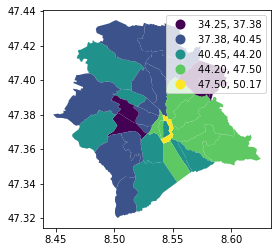

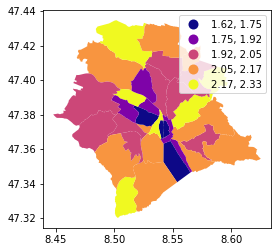

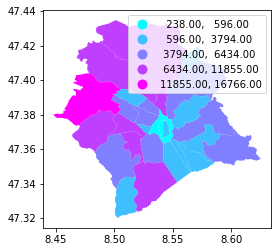

In [49]:
# Plot by StatQuartiere
# Weitere Schemes: scheme='quantiles', scheme='fisherjenks', scheme='natural_breaks',

stadtquartiere_shapes_joined.plot(column='WohnungsflProPers', cmap='viridis', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

stadtquartiere_shapes_joined.plot(column='PersProWhg', cmap='plasma', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html
stadtquartiere_shapes_joined.plot(column='AnzWhgBewohnt', cmap='cool', scheme='natural_breaks', legend=True )
#scheme werte: https://matplotlib.org/2.0.2/users/colormaps.html

Noch zu prüfen, folgendes schöne Beispiel: https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

Konkrete Beispiele von Bookeh in Jupyter NB: https://docs.bokeh.org/en/latest/docs/user_guide/jupyter.html

**Sharepoint als gecheckt markieren!**

Record auf Sharepoint: **[Link](http://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/EditForm.aspx?ID=157&Source=%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs)**